# Mastering regular expressions

Lino Galiana  
2025-12-26

<div class="badge-container"><div class="badge-text">If you want to try the examples in this tutorial:</div><a href="https://github.com/linogaliana/python-datascientist-notebooks/blob/main/notebooks/en/manipulation/04b_regex_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=github&label=&message=View%20on%20GitHub&color=181717" alt="View on GitHub"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/vscode-python?autoLaunch=true&name=«04b_regex_TP»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-vscode.sh»&init.personalInitArgs=«en/manipulation%2004b_regex_TP»" target="_blank" rel="noopener"><img src="https://custom-icon-badges.demolab.com/badge/SSP%20Cloud-Lancer_avec_VSCode-blue?logo=vsc&logoColor=white" alt="Onyxia"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&name=«04b_regex_TP»&init.personalInit=«https%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmain%2Fsspcloud%2Finit-jupyter.sh»&init.personalInitArgs=«en/manipulation%2004b_regex_TP»" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSP%20Cloud-Lancer_avec_Jupyter-orange?logo=Jupyter&logoColor=orange" alt="Onyxia"></a>
<a href="https://colab.research.google.com/github/linogaliana/python-datascientist-notebooks-colab//en/blob/main//notebooks/en/manipulation/04b_regex_TP.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a><br></div>

> **English 🇬🇧 🇺🇸 version**
>
> Ceci est la version française 🇫🇷 de ce chapitre, pour voir la version anglaise rendez-vous sur \<a href="https://pythonds.linogaliana.fr//home/runner/work/python-datascientist/python-datascientist/en/content/manipulation/04b_regex_TP.qmd"\>le site du cours\</a\>.

> **Tip**
>
> <div class="callout callout-style-default callout-tip callout-titled">
> <div class="callout-header d-flex align-content-center">
> <div class="callout-icon-container">
> <i class="callout-icon"></i>
> </div>
> <div class="callout-title-container flex-fill">
> Skills you will acquire in this chapter
> </div>
> </div>
> <div class="callout-body-container callout-body">
>
> -   Understand how regular expressions (regex) offer powerful tools for working with text, especially where simple string methods like `str.find` fall short  
> -   Master the core concepts of regex: character classes (e.g. `[a-z]`), quantifiers (`?`, `*`, `+`, `{}`), anchors, and metacharacters  
> -   Use Python’s `re` module functions—such as `findall`, `search`, `match`, `sub`, and `finditer`—to search, extract, or replace text patterns  
> -   Apply regex effectively to tabular data using `pandas` vectorized string methods like `str.contains`, `str.extract`, `str.findall`, `str.replace`, and `str.count`  
> -   Practice these skills through hands-on exercises such as extracting dates from text or pulling out email addresses and publication years from a DataFrame
>
> </div>
> </div>

# 1. Introduction

`Python` offers a lot of very useful functionalities for handling textual data. This is one of the reasons for its success in the natural language processing (NLP) community (see the dedicated section).

In previous chapters, we sometimes needed to search for basic textual elements. This was possible with the `str.find` method from the `Pandas` package, which is a vectorized version of the basic `find` method. We could also use the basic method directly, especially when performing *web scraping*.

However, this search function quickly reaches its limits. For instance, if we want to find both the singular and plural occurrences of a term, we will need to use the `find` method at least twice. For conjugated verbs, it becomes even more complex, especially if their form changes according to the subject.

For complicated expressions, it is advisable to use **regular expressions** or *“regex”*. This is a feature found in many programming languages. It is a form of grammar that allows for searching for patterns.

Part of the content in this section is an adaptation of the
[collaborative documentation on `R` called `utilitR`](https://www.book.utilitr.org/03_fiches_thematiques/fiche_donnees_textuelles#regex) to which I contributed. This chapter also draws from the book [*R for Data Science*](https://r4ds.hadley.nz/regexps.html) which presents a very pedagogical chapter on regex.

We will use the *package* `re` to illustrate our examples of regular expressions. This is the reference package used by `Pandas` in the background to vectorize text searches.

In [ ]:
import re
import pandas as pd

> **Tip**
>
> <div class="callout callout-style-default callout-tip callout-titled">
> <div class="callout-header d-flex align-content-center">
> <div class="callout-icon-container">
> <i class="callout-icon"></i>
> </div>
> <div class="callout-title-container flex-fill">
> Tip
> </div>
> </div>
> <div class="callout-body-container callout-body">
>
> **Regular expressions (*regex*) are notoriously difficult to master.** There are tools that make working with regular expressions easier.
>
> -   The reference tool for this is \[https://regex101.com/\] which allows you to test `regex` in `Python` with an explanation accompanying the test.
>
> -   Similarly, [this site](https://ole.michelsen.dk/tools/regex/) has a cheat sheet at the bottom of the page.
>
> -   The [Regex Crossword](https://regexcrossword.com/) games allow you to learn regular expressions while having fun.
>
> It can be useful to ask assistant AIs, such as `Github Copilot` or `ChatGPT`, for a first version of a regex by explaining the content you want to extract. This can save a lot of time, except when the AI is overconfident and offers you a completely wrong regex…
>
> </div>
> </div>

# 2. Principle

**Regular expressions are a tool used to describe a set of possible strings according to a precise syntax, and thus define a `pattern`.** Regular expressions are used, for example, when you want to extract a part of a string or replace a part of a string. A regular expression takes the form of a string, which can contain both literal elements and special characters with logical meaning.

For example, `"ch.+n"` is a regular expression that describes the following pattern: the literal string `ch`, followed by any string of at least one character (`.+`), followed by the letter `n`. In the string `"J'ai un chien."`, the substring `"chien"` matches this pattern. The same goes for `"chapeau ron"` in `"J'ai un chapeau rond"`. In contrast, in the string `"La soupe est chaude."`, no substring matches this pattern (because no `n` appears after the `ch`).

To convince ourselves, we can look at the first two cases:

In [ ]:
pattern = "ch.+n"
print(re.search(pattern, "La soupe est chaude."))

None

In the previous example, we had two adjacent quantifiers `.+`. The first (`.`) means any character[1]. The second (`+`) means *“repeat the previous pattern”*. In our case, the combination `.+` allows us to repeat any character before finding an *n*. The number of times is indeterminate: it may not be necessary to intersperse characters before the *n* or it may be necessary to capture several:

[1] Any character except for the newline (`\n`). Keep this in mind; I have already spent hours trying to understand why my `.` did not capture what I wanted spanning multiple lines…

In [ ]:
print(re.search(pattern, "J'ai un chino"))
print(re.search(pattern, "J'ai un chiot très mignon."))

<re.Match object; span=(8, 12), match='chin'>
<re.Match object; span=(8, 25), match='chiot très mignon'>

## 2.1 Character classes

When searching, we are interested in characters and often in character classes: we look for a digit, a letter, a character in a specific set, or a character that does not belong to a specific set. Some sets are predefined, others must be defined using brackets.

To define a character set, you need to write this set within brackets. For example, `[0123456789]` denotes a digit. Since it is a sequence of consecutive characters, we can summarize this notation as `[0-9]`.

For example, if we want to find all patterns that start with a `c` followed by an `h` and then a vowel (a, e, i, o, u), we can try this regular expression:

In [ ]:
re.findall("[c][h][aeiou]", "chat, chien, veau, vache, chèvre")

['cha', 'chi', 'che']

It would be more practical to use `Pandas` in this case to isolate the lines that meet the logical condition (by adding the accents that are otherwise not included):

In [ ]:
import pandas as pd
txt = pd.Series("chat, chien, veau, vache, chèvre".split(", "))
txt.str.match("ch[aeéèiou]")

0     True
1     True
2    False
3    False
4     True
dtype: bool

However, the usage of character classes as shown above is not the most common. They are preferred for identifying complex patterns rather than a sequence of literal characters. Memory aid tables illustrate some of the most common character classes (`[:digit:]` or `\d`…)

## 2.2 Quantifiers

We encountered quantifiers with our first regular expression. They control the number of times a pattern is matched.

The most common are:

-   `?` : 0 or 1 match;
-   `+` : 1 or more matches;
-   `*` : 0 or more matches.

For example, `colou?r` will match both the American and British spellings:

In [ ]:
re.findall("colou?r", "Did you write color or colour?")

['color', 'colour']

These quantifiers can of course be combined with other types of characters, especially character classes. This can be extremely useful. For example, `\d+` will capture one or more digits, `\s?` will optionally add a space, `[\w]{6,8}` will match a word between six and eight letters.

It is also possible to define the number of repetitions with `{}`:

-   `{n}` matches exactly *n* times;
-   `{n,}` matches at least *n* times;
-   `{n,m}` matches between *n* and *m* times.

However, the repetition of terms by default only applies to the last character preceding the quantifier. We can confirm this with the example above:

In [ ]:
print(re.match("toc{4}","toctoctoctoc"))

None

To address this issue, parentheses are used. The principle is the same as with numeric rules: parentheses allow for introducing hierarchy. To revisit the previous example, we get the expected result thanks to the parentheses:

In [ ]:
print(re.match("(toc){4}","toctoctoctoc"))
print(re.match("(toc){5}","toctoctoctoc"))
print(re.match("(toc){2,4}","toctoctoctoc"))

<re.Match object; span=(0, 12), match='toctoctoctoc'>
None
<re.Match object; span=(0, 12), match='toctoctoctoc'>

> **Note**
>
> <div class="callout callout-style-default callout-note callout-titled">
> <div class="callout-header d-flex align-content-center">
> <div class="callout-icon-container">
> <i class="callout-icon"></i>
> </div>
> <div class="callout-title-container flex-fill">
> Note
> </div>
> </div>
> <div class="callout-body-container callout-body">
>
> The regular expression algorithm always tries to match the largest piece to the regular expression.
>
> For example, consider an HTML string:
>
> ``` python
> s = "<h1>Super titre HTML</h1>"
> ```
>
> The regular expression `re.findall("<.*>", s)` potentially matches three pieces:
>
> -   `<h1>`
> -   `</h1>`
> -   `<h1>Super titre HTML</h1>`
>
> It is the last one that will be chosen, as it is the largest. To select the smallest, you need to write the quantifiers like this: `*?`, `+?`. Here are a few examples:
>
> ``` python
> s = "<h1>Super titre HTML</h1>\n<p><code>Python</code> est un langage très flexible</p>"
> print(re.findall("<.*>", s))
> print(re.findall("<p>.*</p>", s))
> print(re.findall("<p>.*?</p>", s))
> print(re.compile("<.*?>").findall(s))
> ```
>
>     ['<h1>Super titre HTML</h1>', '<p><code>Python</code> est un langage très flexible</p>']
>     ['<p><code>Python</code> est un langage très flexible</p>']
>     ['<p><code>Python</code> est un langage très flexible</p>']
>     ['<h1>', '</h1>', '<p>', '<code>', '</code>', '</p>']
>
> </div>
> </div>

## 2.3 Cheat sheet

The table below serves as a cheat sheet for regex:

| Regular expression | Meaning |
|--------------------------|----------------------------------------------|
| `"^"` | Start of the string |
| `"$"` | End of the string |
| `"\\."` | A dot |
| `"."` | Any character |
| `".+"` | Any non-empty sequence of characters |
| `".*"` | Any sequence of characters, possibly empty |
| `"[:alnum:]"` | An alphanumeric character |
| `"[:alpha:]"` | A letter |
| `"[:digit:]"` | A digit |
| `"[:lower:]"` | A lowercase letter |
| `"[:punct:]"` | A punctuation mark |
| `"[:space:]"` | A space |
| `"[:upper:]"` | An uppercase letter |
| `"[[:alnum:]]+"` | A sequence of at least one alphanumeric character |
| `"[[:alpha:]]+"` | A sequence of at least one letter |
| `"[[:digit:]]+"` | A sequence of at least one digit |
| `"[[:lower:]]+"` | A sequence of at least one lowercase letter |
| `"[[:punct:]]+"` | A sequence of at least one punctuation mark |
| `"[[:space:]]+"` | A sequence of at least one space |
| `"[[:upper:]]+"` | A sequence of at least one uppercase letter |
| `"[[:alnum:]]*"` | A sequence of alphanumeric characters, possibly empty |
| `"[[:alpha:]]*"` | A sequence of letters, possibly empty |
| `"[[:digit:]]*"` | A sequence of digits, possibly empty |
| `"[[:lower:]]*"` | A sequence of lowercase letters, possibly empty |
| `"[[:upper:]]*"` | A sequence of uppercase letters, possibly empty |
| `"[[:punct:]]*"` | A sequence of punctuation marks, possibly empty |
| `"[^[:alpha:]]+"` | A sequence of at least one character that is not a letter |
| `"[^[:digit:]]+"` | A sequence of at least one character that is not a digit |
| `"\|"` | Either the expression `x` or `y` is present |
| `[abyz]` | One of the specified characters |
| `[abyz]+` | One or more of the specified characters (possibly repeated) |
| `[^abyz]` | None of the specified characters are present |

Some character classes have lighter syntax because they are very common. Among them:

| Regular expression | Meaning                                      |
|--------------------|----------------------------------------------|
| `\d`               | Any digit                                    |
| `\D`               | Any character that is not a digit            |
| `\s`               | Any space (space, tab, newline)              |
| `\S`               | Any character that is not a space            |
| `\w`               | Any word character (letters and numbers)     |
| `\W`               | Any non-word character (letters and numbers) |

In the following exercise, you will be able to practice the previous examples on a slightly more complete `regex`. This exercise does not require knowledge of the nuances of the `re` package; you will only need `re.findall`.

This exercise will use the following string:

In [ ]:
s = """date 0 : 14/9/2000
date 1 : 20/04/1971     date 2 : 14/09/1913     date 3 : 2/3/1978
date 4 : 1/7/1986     date 5 : 7/3/47     date 6 : 15/10/1914
date 7 : 08/03/1941     date 8 : 8/1/1980     date 9 : 30/6/1976"""
s

'date 0 : 14/9/2000\ndate 1 : 20/04/1971     date 2 : 14/09/1913     date 3 : 2/3/1978\ndate 4 : 1/7/1986     date 5 : 7/3/47     date 6 : 15/10/1914\ndate 7 : 08/03/1941     date 8 : 8/1/1980     date 9 : 30/6/1976'

> **Tip**
>
> <div class="callout callout-style-default callout-tip callout-titled">
> <div class="callout-header d-flex align-content-center">
> <div class="callout-icon-container">
> <i class="callout-icon"></i>
> </div>
> <div class="callout-title-container flex-fill">
> Exercise 1
> </div>
> </div>
> <div class="callout-body-container callout-body">
>
> 1.  First, extract the day of birth.
>     -   The first digit of the day is 0, 1, 2, or 3. Translate this into a `[X-X]` sequence.
>     -   The second digit of the day is between 0 and 9. Translate this into the appropriate sequence.
>     -   Note that the first digit of the day is optional. Insert the appropriate quantifier between the two character classes.
>     -   Add the slash after the pattern.
>     -   Test with `re.findall`. You should get many more matches than needed. This is normal; at this stage, the regex is not yet finalized.
> 2.  Follow the same logic for the months, noting that Gregorian calendar months never exceed the first dozen. Test with `re.findall`.
> 3.  Do the same for the birth years, noting that, unless proven otherwise, for people alive today, the relevant millennia are limited. Test with `re.findall`.
> 4.  This regex is not natural; one could be satisfied with generic character classes `\d`, even though they might practically select impossible birth dates (e.g., `43/78/4528`). This would simplify the regex, making it more readable. Don’t forget the usefulness of quantifiers.
> 5.  How can the regex be adapted to always be valid for our cases but also capture dates of the type `YYYY/MM/DD`? Test with `1998/07/12`.
>
> </div>
> </div>

In [ ]:
exo1_q1 = re.findall("[0-3]?[0-9]/", s)

In [ ]:
exo1_q2 = re.findall("[0-3]?[0-9]/[0-1]?[0-9]", s)

In [ ]:
# Question 3
exo1_q3 = re.findall(
    "[0-3]?[0-9]/[0-1]?[0-9]/[0-2]?[0-9]?[0-9][0-9]", s
)

In [ ]:
# Question 4
exo1_q4 = re.findall("\d{1,2}/\d{1,2}/\d{2,4}", s)

In [ ]:
# Question 5
exo1_q5 = re.findall(
    "\d{1,4}/\d{1,2}/\d{1,4}", s + "\n 1998/07/12"
)

At the end of question 1, you should have this result:

In [ ]:
exo1_q1

['14/',
 '9/',
 '20/',
 '04/',
 '14/',
 '09/',
 '2/',
 '3/',
 '1/',
 '7/',
 '7/',
 '3/',
 '15/',
 '10/',
 '08/',
 '03/',
 '8/',
 '1/',
 '30/',
 '6/']

At the end of question 2, you should have this result, which is starting to take shape:

In [ ]:
exo1_q2

['14/9',
 '20/04',
 '14/09',
 '2/3',
 '1/7',
 '7/3',
 '15/10',
 '08/03',
 '8/1',
 '30/6']

At the end of question 3, you should be able to extract the dates:

In [ ]:
exo1_q3

['14/9/2000',
 '20/04/1971',
 '14/09/1913',
 '2/3/1978',
 '1/7/1986',
 '7/3/47',
 '15/10/1914',
 '08/03/1941',
 '8/1/1980',
 '30/6/1976']

If all goes well, by question 5, your regex should work:

In [ ]:
exo1_q5

['14/9/2000',
 '20/04/1971',
 '14/09/1913',
 '2/3/1978',
 '1/7/1986',
 '7/3/47',
 '15/10/1914',
 '08/03/1941',
 '8/1/1980',
 '30/6/1976',
 '1998/07/12']

# 3. Main `re` functions

Here is a summary table of the main functions of the `re` package with examples.

We have mainly used `re.findall` so far, which is one of the most practical functions in the package. `re.sub` and `re.search` are also quite useful. The others are less critical but can be helpful in specific cases.

| Function | Purpose |
|-------------------------------------|-----------------------------------|
| `re.match(<regex>, s)` | Find and return the **first** match of the regular expression `<regex>` **from the beginning** of the string `s` |
| `re.search(<regex>, s)` | Find and return the **first** match of the regular expression `<regex>` **regardless of its position** in the string `s` |
| `re.finditer(<regex>, s)` | Find and return an iterator storing all matches of the regular expression `<regex>` **regardless of their position(s)** in the string `s`. Typically, a loop is performed over this iterator |
| `re.findall(<regex>, s)` | Find and return **all matches** of the regular expression `<regex>` **regardless of their position(s)** in the string `s` as a **list** |
| `re.sub(<regex>, new_text, s)` | Find and **replace all** matches of the regular expression `<regex>` **regardless of their position(s)** in the string `s` |

To illustrate these functions, here are some examples:

<details><summary>Example of <code>re.match</code> 👇</summary>

`re.match` can only capture a pattern at the start of a string. Its utility is thus limited. Let’s capture `toto`:

``` python
re.match("(to){2}", "toto at the beach")
```

    <re.Match object; span=(0, 4), match='toto'>

</details>

<details><summary>Example of <code>re.search</code> 👇</summary>

`re.search` is more powerful than `re.match`, allowing capture of terms regardless of their position in a string. For example, to capture *age*:

``` python
re.search("age", "toto is of age to go to the beach")
```

    <re.Match object; span=(11, 14), match='age'>

And to capture exclusively *“age”* at the end of the string:

``` python
re.search("age$", "toto is of age to go to the beach")
```

</details>

<details><summary>Example of <code>re.finditer</code> 👇</summary>

`re.finditer` is, in my opinion, less practical than `re.findall`. Its main use compared to `re.findall` is capturing the position within a text field:

``` python
s = "toto is of age to go to the beach"
for match in re.finditer("age", s):
    start = match.start()
    end = match.end()
    print(f'String match "{s[start:end]}" at {start}:{end}')
```

    String match "age" at 11:14

</details>

<details><summary>Example of <code>re.sub</code> 👇</summary>

`re.sub` allows capturing and replacing expressions. For example, let’s replace *“age”* with *“âge”*. But be careful, you don’t want to do this when the pattern is present in *“beach”*. So, we’ll add a negative condition: capture *“age”* only if it is not at the end of the string (which translates to regex as `?!$`).

``` python
re.sub("age(?!$)", "âge", "toto a l'age d'aller à la plage")
```

    "toto a l'âge d'aller à la plage"

</details>

> **Tip**
>
> <div class="callout callout-style-default callout-tip callout-titled">
> <div class="callout-header d-flex align-content-center">
> <div class="callout-icon-container">
> <i class="callout-icon"></i>
> </div>
> <div class="callout-title-container flex-fill">
> When to use re.compile and raw strings?
> </div>
> </div>
> <div class="callout-body-container callout-body">
>
> `re.compile` can be useful when you use a regular expression multiple times in your code. It allows you to compile the regular expression into an object recognized by `re`, which can be more efficient in terms of performance when the regular expression is used repeatedly or on large data sets.
>
> Raw strings (`raw string`) are special strings in `Python` that start with `r`. For example, `r"toto at the beach"`. They can be useful to prevent escape characters from being interpreted by `Python`. For instance, if you want to search for a string containing a backslash `\` in a string, you need to use a raw string to prevent the backslash from being interpreted as an escape character (`\t`, `\n`, etc.). The tester <https://regex101.com/> also assumes you are using raw strings, so it can be useful to get used to them.
>
> </div>
> </div>

# 4. Generalization with `Pandas`

`Pandas` methods are extensions of those in `re` that avoid looping to check each line with a regex. In practice, when working with `DataFrames`, the `pandas` API is preferred over `re`. Code of the form `df.apply(lambda x: re.<function>(<regex>,x), axis = 1)` should be avoided as it is very inefficient.

The names sometimes change slightly compared to their `re` equivalents.

| Method | Description |
|-----------------------------------------|-------------------------------|
| `str.count()` | Count the number of occurrences of the pattern in each line |
| `str.replace()` | Replace the pattern with another value. Vectorized version of `re.sub()` |
| `str.contains()` | Test if the pattern appears, line by line. Vectorized version of `re.search()` |
| `str.extract()` | Extract groups that match a pattern and return them in a column |
| `str.findall()` | Find and return all occurrences of a pattern. If a line contains multiple matches, a list is returned. Vectorized version of `re.findall()` |

Additionally, there are `str.split()` and `str.rsplit()` methods which are quite useful.

<details><summary>Example of <code>str.count</code> 👇</summary>

You can count the number of times a pattern appears with `str.count`:

``` python
df = pd.DataFrame({"a": ["toto", "titi"]})
df['a'].str.count("to")
```

    0    2
    1    0
    Name: a, dtype: int64

</details>

<details><summary>Example of <code>str.replace</code> 👇</summary>

Replace the pattern *“ti”* at the end of the string:

``` python
df = pd.DataFrame({"a": ["toto", "titi"]})
df['a'].str.replace("ti$", " punch")
```

    0    toto
    1    titi
    Name: a, dtype: object

</details>

<details><summary>Example of <code>str.contains</code> 👇</summary>

Check the cases where our line ends with *“ti”*:

``` python
df = pd.DataFrame({"a": ["toto", "titi"]})
df['a'].str.contains("ti$")
```

    0    False
    1     True
    Name: a, dtype: bool

</details>

<details><summary>Example of <code>str.findall</code> 👇</summary>

``` python
df = pd.DataFrame({"a": ["toto", "titi"]})
df['a'].str.findall("to")
```

    0    [to, to]
    1          []
    Name: a, dtype: object

</details>

> **Warning**
>
> <div class="callout callout-style-default callout-warning callout-titled">
> <div class="callout-header d-flex align-content-center">
> <div class="callout-icon-container">
> <i class="callout-icon"></i>
> </div>
> <div class="callout-title-container flex-fill">
> Warning
> </div>
> </div>
> <div class="callout-body-container callout-body">
>
> Currently, it is not necessary to add the `regex = True` argument, but this should be the case in a future version of `pandas`. It might be worth getting into the habit of adding it.
>
> </div>
> </div>

# 5. For more information

-   [Collaborative documentation on `R` named `utilitR`](https://www.book.utilitr.org/03_fiches_thematiques/fiche_donnees_textuelles#regex)
-   [*R for Data Science*](https://r4ds.hadley.nz/regexps.html)
-   [*Regular Expression HOWTO* in the official `Python` documentation](https://docs.python.org/3/howto/regex.html)
-   The reference tool \[https://regex101.com/\] for testing regular expressions
-   [This site](https://ole.michelsen.dk/tools/regex/) which has a cheat sheet at the bottom of the page.
-   The games on [Regex Crossword](https://regexcrossword.com/) allow you to learn regular expressions while having fun

# 6. Additional exercises

## 6.1 Extracting email addresses

This is a classic use of *regex*

In [ ]:
text_emails = 'Hello from toto@gmail.com to titi.grominet@yahoo.com about the meeting @2PM'

> **Tip**
>
> <div class="callout callout-style-default callout-tip callout-titled">
> <div class="callout-header d-flex align-content-center">
> <div class="callout-icon-container">
> <i class="callout-icon"></i>
> </div>
> <div class="callout-title-container flex-fill">
> Exercise 2: Extracting email addresses
> </div>
> </div>
> <div class="callout-body-container callout-body">
>
> Use the structure of an email address `[XXXX]@[XXXX]` to retrieve this content.
>
> </div>
> </div>

## 6.2 Extracting years from a `pandas` `DataFrame`

The general objective of the exercise is to clean columns in a DataFrame using regular expressions.

> **Tip**
>
> <div class="callout callout-style-default callout-tip callout-titled">
> <div class="callout-header d-flex align-content-center">
> <div class="callout-icon-container">
> <i class="callout-icon"></i>
> </div>
> <div class="callout-title-container flex-fill">
> Exercise 3
> </div>
> </div>
> <div class="callout-body-container callout-body">
>
> The dataset in question contains books from the British Library and some related information. The dataset is available here: https://raw.githubusercontent.com/realpython/python-data-cleaning/master/Datasets/BL-Flickr-Images-Book.csv
>
> The “Date of Publication” column is not always a year; sometimes there are other details. The goal of the exercise is to have **a clean book publication date** and to examine the **distribution of publication years**.
>
> To do this, you can:
>
> -   Either choose to perform the exercise without help. Your **reading of the instructions ends here**. You should carefully examine the dataset and transform it yourself.
>
> -   Or follow the step-by-step instructions below.
>
> <details>
>
> <summary>
>
> Guided version 👇
>
> </summary>
>
> 1.  Read the data from the URL `https://raw.githubusercontent.com/realpython/python-data-cleaning/master/Datasets/BL-Flickr-Images-Book.csv`. Be careful with the separator.
> 2.  Keep only the columns `['Identifier', 'Place of Publication', 'Date of Publication', 'Publisher', 'Title', 'Author']`.
> 3.  Observe the *‘Date of Publication’* column and note the issues with some rows (e.g., row 13).
> 4.  Start by looking at the number of missing values. We cannot do better after regex, and normally we should not have fewer…
> 5.  Determine the regex pattern for a publication date. Presumably, there are 4 digits forming a year. Use the `str.extract()` method with the `expand = False` argument (to keep only the first date matching our pattern)?
> 6.  We have 2 `NaN` values that were not present at the start of the exercise. What are they and why?
> 7.  What is the distribution of publication dates in the dataset? You can, for example, display a histogram using the `plot` method with the `kind = "hist"` argument.
>
> </details>
>
> </div>
> </div>

In [ ]:
# Question 1
data_books = pd.read_csv('https://raw.githubusercontent.com/realpython/python-data-cleaning/master/Datasets/BL-Flickr-Images-Book.csv',sep=',')

In [ ]:
# Question 2
data_books = data_books.loc[
    :,
    ['Identifier', 'Place of Publication', 'Date of Publication', 'Publisher', 'Title', 'Author']
]

Here is an example of the problem to detect in question 3:

In [ ]:
# Question 3
(
    data_books
    .loc[: , ['Date of Publication',"Title"]]
    .iloc[13:20]
)

Question 4 answer should be

In [ ]:
# Question 4
data_books['Date of Publication'].isna().sum()

np.int64(181)

In [ ]:
# Question 5
expression = "([0-2][0-9][0-9][0-9])"
data_books['year'] = (
    data_books['Date of Publication']
    .str.extract(expression, expand=False)
)

answer_q5 = (
    data_books
    .loc[
        ~(data_books['Date of Publication'] == data_books['year']),
        ['Date of Publication', 'year']
    ]
)

With our regex (question 5), we obtain a `DataFrame` that is more in line with our expectations:

In [ ]:
answer_q5

1759 rows × 2 columns

As for the new `NaN` values, they are rows that did not contain any strings resembling years:

In [ ]:
(
  data_books
  .loc[
    ~data_books['Date of Publication'].isna() & data_books['year'].isna(),
    ['Date of Publication', 'year']
  ]
)

Finally, we obtain the following histogram of publication dates:

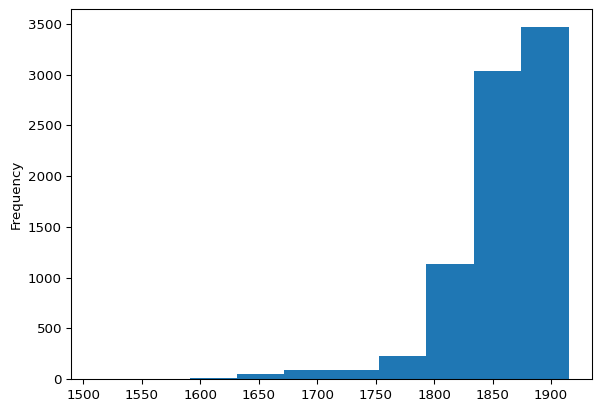

In [ ]:
pd.to_numeric(data_books['year'], downcast='integer').plot(kind ="hist")